In [ ]:
import warnings
import os
import glob
from PIL import Image
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model

# Mounting the Google Drive to the Colab environment
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_folder = "/content/drive/MyDrive/COVID-19_Radiography_Dataset/Test_Images/"

# Use glob to get a list of all image files in the folder
image_paths = glob.glob(image_folder + "*.jpg")

# Define class labels
class_labels = ['Normal', 'COVID', 'Viral Pneumonia', 'Other']

# Set up a grid for the plots
num_cols = 4
num_rows = (len(image_paths) // num_cols) + 1

# Multiple images tesing

1/1 [==============================] - 0s 101ms/step
Prediction for image /content/drive/MyDrive/COVID-19_Radiography_Dataset/Test_Images/NORMAL(1267).jpg: Normal
1/1 [==============================] - 0s 24ms/step
Prediction for image /content/drive/MyDrive/COVID-19_Radiography_Dataset/Test_Images/PNEUMONIA(4023).jpg: Viral Pneumonia
1/1 [==============================] - 0s 24ms/step
Prediction for image /content/drive/MyDrive/COVID-19_Radiography_Dataset/Test_Images/PNEUMONIA(4083).jpg: Viral Pneumonia
1/1 [==============================] - 0s 30ms/step
Prediction for image /content/drive/MyDrive/COVID-19_Radiography_Dataset/Test_Images/COVID-19 (1029).jpg: COVID


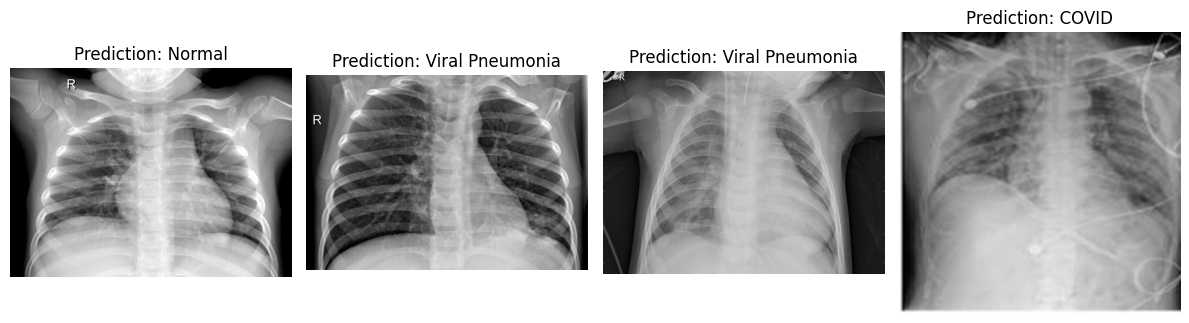

In [ ]:
cnn_fine_tuned = load_model('/content/drive/MyDrive/COVID-19_Radiography_Dataset/conv_model_tuned.h5')

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Load and process each image
for idx, image_path in enumerate(image_paths):
    input_image = cv2.imread(image_path)

    # Calculate the position in the grid
    row = idx // num_cols
    col = idx % num_cols

    # Display the image
    axes[row, col].imshow(input_image)
    axes[row, col].axis('off')

    input_image = cv2.resize(input_image, (70, 70))
    input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension
    input_image = input_image / 255.0

    predictions = cnn_fine_tuned.predict(input_image)

    # Convert the predictions to labels
    predicted_labels = np.argmax(predictions, axis=1)

    predicted_classes = [class_labels[label] for label in predicted_labels]

    # Set title with the predicted class and print the prediction
    axes[row, col].set_title(f"Prediction: {predicted_classes[0]}")

    # Print the prediction
    print(f"Prediction for image {image_path}: {predicted_classes[0]}")


# Remove any empty subplots
for i in range(len(image_paths), num_rows*num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Single image tesing

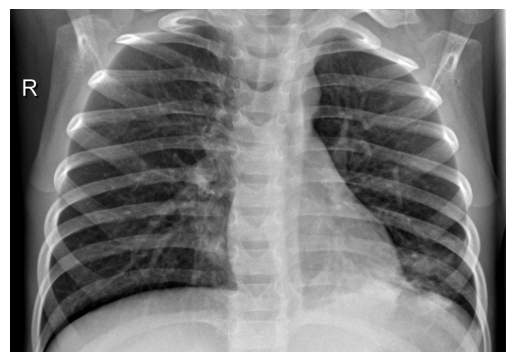

1/1 [==============================] - 0s 94ms/step
Prediction for image 1: Viral Pneumonia


In [ ]:
cnn_fine_tuned = load_model('/content/drive/MyDrive/COVID-19_Radiography_Dataset/conv_model_tuned.h5')

image_path = "/content/drive/MyDrive/COVID-19_Radiography_Dataset/Test_Images/PNEUMONIA(4023).jpg"
input_image = cv2.imread(image_path)
plt.imshow(input_image)
plt.axis('off')
plt.show()
input_image = cv2.resize(input_image, (70, 70))
input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension
input_image = input_image / 255.0

predictions = cnn_fine_tuned.predict(input_image)

# Convert the predictions to labels
predicted_labels = np.argmax(predictions, axis=1)

class_labels = ['Normal', 'COVID', 'Viral Pneumonia', 'Other']

predicted_classes = [class_labels[label] for label in predicted_labels]

for i in range(len(input_image)):
    print(f"Prediction for image {i+1}: {predicted_classes[i]}")